In [ ]:
import pandas as pd
from google.colab import files


In [ ]:
uploaded = files.upload()

Saving 2016.csv to 2016.csv


In [ ]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "2016.csv" with length 97492262 bytes


In [ ]:
uploaded

In [ ]:
import pandas as pd
import io
df = pd.read_csv(io.StringIO(uploaded['2016.csv'].decode('utf-8')))
print(df)

            FL_DATE OP_CARRIER  ...  SECURITY_DELAY LATE_AIRCRAFT_DELAY
0        01/01/2016         DL  ...             NaN                 NaN
1        01/01/2016         DL  ...             NaN                 NaN
2        01/01/2016         DL  ...             NaN                 NaN
3        01/01/2016         DL  ...             NaN                 NaN
4        01/01/2016         DL  ...             0.0                 0.0
...             ...        ...  ...             ...                 ...
1048570  12/03/2016         UA  ...             NaN                 NaN
1048571  12/03/2016         UA  ...             NaN                 NaN
1048572  12/03/2016         UA  ...             NaN                 NaN
1048573  12/03/2016         UA  ...             NaN                 NaN
1048574  12/03/2016         UA  ...             NaN                 NaN

[1048575 rows x 27 columns]


In [ ]:
df.isnull().sum()

FL_DATE                      0
OP_CARRIER                   0
OP_CARRIER_FL_NUM            0
ORIGIN                       0
DEST                         0
CRS_DEP_TIME                 0
DEP_TIME                 19658
DEP_DELAY                19658
TAXI_OUT                 20033
WHEELS_OFF               20033
WHEELS_ON                20718
TAXI_IN                  20718
CRS_ARR_TIME                 0
ARR_TIME                 20718
ARR_DELAY                22360
CANCELLED                    0
CANCELLATION_CODE      1028407
DIVERTED                     0
CRS_ELAPSED_TIME             0
ACTUAL_ELAPSED_TIME      22360
AIR_TIME                 22360
DISTANCE                     0
CARRIER_DELAY           886710
WEATHER_DELAY           886710
NAS_DELAY               886710
SECURITY_DELAY          886710
LATE_AIRCRAFT_DELAY     886710
dtype: int64

In [ ]:
imputation_mean = df.copy()
imputation_mean['CRS_DEP_TIME_Mean'] = imputation_mean['CRS_DEP_TIME'].fillna(df['CRS_DEP_TIME'].mean())
imputation_mean['DEP_TIME'] = imputation_mean['DEP_TIME'].fillna(df['DEP_TIME'].mean())
imputation_mean['CRS_ARR_TIME_Mean'] = imputation_mean['CRS_ARR_TIME'].fillna(df['CRS_ARR_TIME'].mean())
imputation_mean['ARR_TIME'] = imputation_mean['ARR_TIME'].fillna(df['ARR_TIME'].mean())
imputation_mean['ACTUAL_ELAPSED_TIME_Mean'] = imputation_mean['ACTUAL_ELAPSED_TIME'].fillna(df['ACTUAL_ELAPSED_TIME'].mean())
imputation_mean['CRS_ELAPSED_TIME'] = imputation_mean['CRS_ELAPSED_TIME'].fillna(df['CRS_ELAPSED_TIME'].mean())

In [ ]:
anomaly1 = imputation_mean[["CRS_DEP_TIME_Mean","DEP_TIME"]]
anomaly2 = imputation_mean[["CRS_ARR_TIME_Mean","ARR_TIME"]]
anomaly3 = imputation_mean[["CRS_ELAPSED_TIME", "ACTUAL_ELAPSED_TIME_Mean"]]


In [ ]:
anomaly1

,CRS_DEP_TIME_Mean,DEP_TIME
0,1935,1935.0
1,2125,2130.0
2,2255,2256.0
3,1656,1700.0
4,900,1012.0
...,...,...
1048570,700,658.0
1048571,1405,1357.0
1048572,1509,1507.0
1048573,1840,1841.0


In [ ]:
anomaly2

,CRS_ARR_TIME_Mean,ARR_TIME
0,2144,2120.0
1,2321,2319.0
2,600,547.0
3,2229,2213.0
4,1216,1420.0
...,...,...
1048570,1205,1132.0
1048571,1740,1714.0
1048572,1844,1832.0
1048573,2130,2109.0


In [ ]:
anomaly3

,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME_Mean
0,309,285.0
1,116,109.0
2,245,231.0
3,213,193.0
4,136,188.0
...,...,...
1048570,245,214.0
1048571,275,257.0
1048572,275,265.0
1048573,170,148.0


In [ ]:
detection1 = anomaly1
detection2 = anomaly2
detection3 = anomaly3


In [ ]:
detection1.isnull().sum()

CRS_DEP_TIME_Mean    0
DEP_TIME             0
dtype: int64

In [ ]:
detection2.isnull().sum()

CRS_ARR_TIME_Mean    0
ARR_TIME             0
dtype: int64

In [ ]:
detection3.isnull().sum()

CRS_ELAPSED_TIME            0
ACTUAL_ELAPSED_TIME_Mean    0
dtype: int64

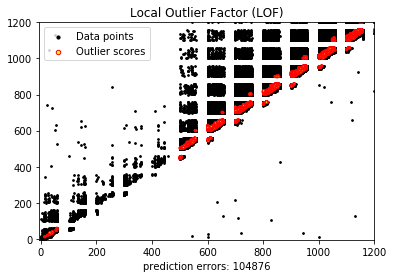

In [ ]:
#LOF#detection1
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor


np.random.seed(42)

X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]

X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.r_[X_inliers, X_outliers]
n_outliers = len(X_outliers)
ground_truth = np.ones(len(detection1), dtype=int)
ground_truth[-n_outliers:] = -1


clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
detection1['anomaly'] = clf.fit_predict(detection1)
detection1['anomaly'] = detection1['anomaly'].map( {1: 0, -1: 1} )
detection1['anomaly'].value_counts())
n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_

plt.title("Local Outlier Factor (LOF)")
plt.scatter(detection1.iloc[:, 0], detection1.iloc[:, 1], color='k', s=3., label='Data points')
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(detection1.iloc[:, 0], detection1.iloc[:, 1], s=1000 * radius, edgecolors='r',
            facecolors='yellow', label='Outlier scores')
plt.axis('tight')
plt.xlim((-5, 1200))
plt.ylim((-5, 1200))
plt.xlabel("prediction errors: %d" % (n_errors))
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()

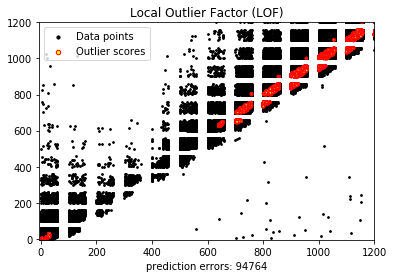

In [ ]:
#LOF#detection2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor


np.random.seed(42)

X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]

X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.r_[X_inliers, X_outliers]
n_outliers = len(X_outliers)
ground_truth = np.ones(len(detection2), dtype=int)
ground_truth[-n_outliers:] = -1


clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
detection2['anomaly'] = clf.fit_predict(detection2)
detection2['anomaly'] = detection2['anomaly'].map( {1: 0, -1: 1} )
detection2['anomaly'].value_counts()
n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_

plt.title("Local Outlier Factor (LOF)")
plt.scatter(detection2.iloc[:, 0], detection2.iloc[:, 1], color='k', s=3., label='Data points')
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(detection2.iloc[:, 0], detection2.iloc[:, 1], s=1000 * radius, edgecolors='r',
            facecolors='yellow', label='Outlier scores')
plt.axis('tight')
plt.xlim((-5, 1200))
plt.ylim((-5, 1200))
plt.xlabel("prediction errors: %d" % (n_errors))
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()

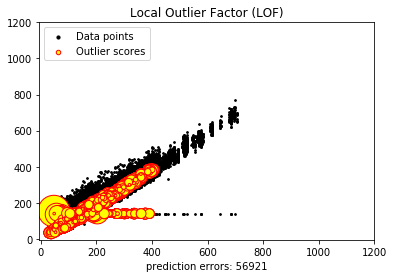

In [ ]:
#LOF#detection3
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor


np.random.seed(42)

X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]

X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.r_[X_inliers, X_outliers]
n_outliers = len(X_outliers)
ground_truth = np.ones(len(detection3), dtype=int)
ground_truth[-n_outliers:] = -1


clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
detection3['anomaly'] = clf.fit_predict(detection3)
detection3['anomaly'] = detection3['anomaly'].map( {1: 0, -1: 1} )
detection3['anomaly'].value_counts()
n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_

plt.title("Local Outlier Factor (LOF)")
plt.scatter(detection3.iloc[:, 0], detection3.iloc[:, 1], color='k', s=3., label='Data points')
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(detection3.iloc[:, 0], detection3.iloc[:, 1], s=1000 * radius, edgecolors='r',
            facecolors='yellow', label='Outlier scores')
plt.axis('tight')
plt.xlim((-5, 1200))
plt.ylim((-5, 1200))
plt.xlabel("prediction errors: %d" % (n_errors))
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()

In [ ]:
p1 = (detection1['DEP_TIME'] >= detection1['DEP_TIME'].quantile(0.98)) 
p2 = (detection1['CRS_DEP_TIME_Mean'] >= detection1['CRS_DEP_TIME_Mean'].quantile(0.98))
p3 = (detection2['ARR_TIME'] >= detection2['ARR_TIME'].quantile(0.98)) 
p4 = (detection2['CRS_ARR_TIME_Mean'] >= detection2['CRS_ARR_TIME_Mean'].quantile(0.98))
p5 = (detection3['ACTUAL_ELAPSED_TIME_Mean'] >= detection3['ACTUAL_ELAPSED_TIME_Mean'].quantile(0.98)) 
p6 = (detection3['CRS_ELAPSED_TIME'] >= detection3['CRS_ELAPSED_TIME'].quantile(0.98))
import numpy as np
detection1['anomaly_manual'] = (p1 | p2).astype(np.int)
detection2['anomaly_manual'] = (p3 | p4).astype(np.int)
detection3['anomaly_manual'] = (p5 | p6).astype(np.int)

In [ ]:
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, confusion_matrix,precision_score
def get_sensitivity_specificity(y_true, y_pred):
    cf = confusion_matrix(y_true, y_pred)
    sensitivity = cf[0,0]/(cf[:,0].sum())
    specificity = cf[1,1]/(cf[:,1].sum())
    return sensitivity, specificity

In [ ]:
f1_lof = f1_score(detection1['anomaly_manual'],detection1['anomaly'])
acc_lof = accuracy_score(detection1['anomaly_manual'],detection1['anomaly'])
pre_lof = precision_score(detection1['anomaly_manual'],detection1['anomaly'])
roc_lof = roc_auc_score(detection1['anomaly_manual'],detection1['anomaly'])
sen_lof, spec_lof = get_sensitivity_specificity(detection1['anomaly_manual'],detection1['anomaly'])
met_lof = {
           'f1_score': f1_lof,
           'accuracy': acc_lof,
           'precision_score': pre_lof,
           'roc_score': roc_lof,
           'sensitivity': sen_lof,
           'specificity': spec_lof
          }
  
f1_lof = f1_score(detection2['anomaly_manual'],detection2['anomaly'])
acc_lof = accuracy_score(detection2['anomaly_manual'],detection2['anomaly'])
pre_lof = precision_score(detection2['anomaly_manual'],detection2['anomaly'])
roc_lof = roc_auc_score(detection2['anomaly_manual'],detection2['anomaly'])
sen_sen_lof, spec_lof = get_sensitivity_specificity(detection2['anomaly_manual'],detection2['anomaly'])
met_lof2 = {
           'f1_score': f1_lof,
           'accuracy': acc_lof,
           'precision_score': pre_lof,
           'roc_score': roc_lof,
           'sensitivity': sen_lof,
           'specificity': spec_lof
          }

f1_lof = f1_score(detection3['anomaly_manual'],detection3['anomaly'])
acc_lof = accuracy_score(detection3['anomaly_manual'],detection3['anomaly'])
pre_lof = precision_score(detection3['anomaly_manual'],detection3['anomaly'])
roc_lof = roc_auc_score(detection3['anomaly_manual'],detection3['anomaly'])
sen_sen_lof, spec_lof = get_sensitivity_specificity(detection3['anomaly_manual'],detection3['anomaly'])
met_lof3 = {
           'f1_score': f1_lof,
           'accuracy': acc_lof,
           'precision_score': pre_lof,
           'roc_score': roc_lof,
           'sensitivity': sen_lof,
           'specificity': spec_lof
          }

In [ ]:
metrics = {'detection1': met_lof,
           'detection2': met_lof2,
           'detection3': met_lof3
           }
metrics_df = pd.DataFrame.from_dict(metrics)
metrics_df

,detection1,detection2,detection3
f1_score,0.070513,0.037778,0.254105
accuracy,0.882787,0.884620,0.941694
precision_score,0.044460,0.025064,0.182894
roc_score,0.536099,0.492943,0.685336
sensitivity,0.975935,0.975935,0.975935
specificity,0.044460,0.025064,0.182894


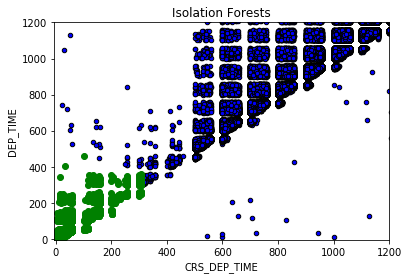

In [ ]:
#isolation forest#detection1
from sklearn.ensemble import IsolationForest
import numpy as np
import matplotlib.pyplot as plt

outlier_fraction = 0.028

model =  IsolationForest(n_jobs=-1, n_estimators=200, max_features=0.25, contamination=outlier_fraction)
model.fit(detection1)
detection1['anomaly_isolated'] = pd.Series(model.predict(detection1))
detection1['anomaly_isolated'] = detection1['anomaly_isolated'].map( {1: 0, -1: 1} )
detection1['anomaly_isolated'].value_counts()


cmap=np.array(['blue','green'])
plt.scatter(detection1.iloc[:,0],detection1.iloc[:,1],c='blue',s=20,edgecolor='k')
X=if_anomalies.iloc[:,0]
Y=if_anomalies.iloc[:,1]
plt.xlim((-5, 1200))
plt.ylim((-5, 1200))
plt.scatter(X,Y,c='green')
plt.xlabel('CRS_DEP_TIME')
plt.ylabel('DEP_TIME')
plt.title('Isolation Forests')
plt.show()



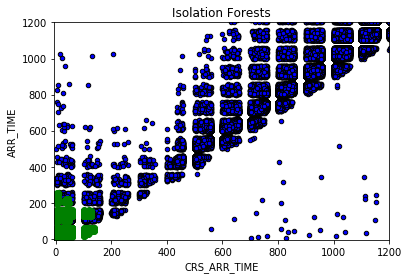

In [ ]:
#isolation forest #detection2
from sklearn.ensemble import IsolationForest
import numpy as np
import matplotlib.pyplot as plt


outlier_fraction = 0.028

model =  IsolationForest(n_jobs=-1, n_estimators=200, max_features=0.25, contamination=outlier_fraction)
model.fit(detection2)
detection2['anomaly_isolated'] = pd.Series(model.predict(detection2))
detection2['anomaly_isolated'] = detection2['anomaly_isolated'].map( {1: 0, -1: 1} )
detection2['anomaly_isolated'].value_counts()

cmap=np.array(['blue','green'])
plt.scatter(detection2.iloc[:,0],detection2.iloc[:,1],c='blue',s=20,edgecolor='k')
X=if_anomalies.iloc[:,0]
Y=if_anomalies.iloc[:,1]
plt.xlim((-5, 1200))
plt.ylim((-5, 1200))
plt.scatter(X,Y,c='green')
plt.xlabel('CRS_ARR_TIME')
plt.ylabel('ARR_TIME')
plt.title('Isolation Forests')
plt.show()

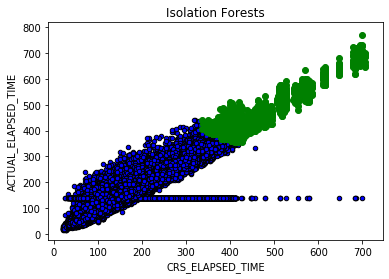

In [ ]:
#isolation forest #detection3
from sklearn.ensemble import IsolationForest
import numpy as np
import matplotlib.pyplot as plt

outlier_fraction = 0.028

model =  IsolationForest(n_jobs=-1, n_estimators=200, max_features=0.25, contamination=outlier_fraction)
model.fit(detection3)
detection3['anomaly_isolated'] = pd.Series(model.predict(detection3))
detection3['anomaly_isolated'] = detection3['anomaly_isolated'].map( {1: 0, -1: 1} )
detection3['anomaly_isolated'].value_counts()

cmap=np.array(['blue','green'])
plt.scatter(detection3.iloc[:,0],detection3.iloc[:,1],c='blue',s=20,edgecolor='k')
X=if_anomalies.iloc[:,0]
Y=if_anomalies.iloc[:,1]
plt.scatter(X,Y,c='green')
plt.xlabel('CRS_ELAPSED_TIME')
plt.ylabel('ACTUAL_ELAPSED_TIME')
plt.title('Isolation Forests')
plt.show()

In [ ]:
i1 = (detection1['DEP_TIME'] >= detection1['DEP_TIME'].quantile(0.98)) 
i2 = (detection1['CRS_DEP_TIME_Mean'] >= detection1['CRS_DEP_TIME_Mean'].quantile(0.98))
i3 = (detection2['ARR_TIME'] >= detection2['ARR_TIME'].quantile(0.98)) 
i4 = (detection2['CRS_ARR_TIME_Mean'] >= detection2['CRS_ARR_TIME_Mean'].quantile(0.98))
i5 = (detection3['ACTUAL_ELAPSED_TIME_Mean'] >= detection3['ACTUAL_ELAPSED_TIME_Mean'].quantile(0.98)) 
i6 = (detection3['CRS_ELAPSED_TIME'] >= detection3['CRS_ELAPSED_TIME'].quantile(0.98))

detection1['anomaly_manual'] = (i1 | i2).astype(np.int)
detection2['anomaly_manual'] = (i3 | i4).astype(np.int)
detection3['anomaly_manual'] = (i5 | i6).astype(np.int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

In [ ]:


f1_iso = f1_score(detection1['anomaly_manual'],detection1['anomaly_isolated'])
acc_iso = accuracy_score(detection1['anomaly_manual'],detection1['anomaly_isolated'])
roc_iso = roc_auc_score(detection1['anomaly_manual'],detection1['anomaly_isolated'])
pre_iso = precision_score(detection1['anomaly_manual'],detection1['anomaly_isolated'])
sen_iso, spec_iso = get_sensitivity_specificity(detection1['anomaly_manual'],detection1['anomaly_isolated'])
met_iso = {
           'f1_score': f1_iso,
           'accuracy': acc_iso,
           'precision':pre_iso,
           'roc_score': roc_iso,
           'sensitivity': sen_iso,
           'specificity': spec_iso
}

f1_iso = f1_score(detection2['anomaly_manual'],detection2['anomaly_isolated'])
acc_iso = accuracy_score(detection2['anomaly_manual'],detection2['anomaly_isolated'])
roc_iso = roc_auc_score(detection2['anomaly_manual'],detection2['anomaly_isolated'])
pre_iso = precision_score(detection2['anomaly_manual'],detection2['anomaly_isolated'])
sen_iso, spec_iso = get_sensitivity_specificity(detection2['anomaly_manual'],detection2['anomaly_isolated'])
met_iso2 = {
           'f1_score': f1_iso,
           'accuracy': acc_iso,
           'precision':pre_iso,
           'roc_score': roc_iso,
           'sensitivity': sen_iso,
           'specificity': spec_iso
}

f1_iso = f1_score(detection3['anomaly_manual'],detection3['anomaly_isolated'])
acc_iso = accuracy_score(detection3['anomaly_manual'],detection3['anomaly_isolated'])
roc_iso = roc_auc_score(detection3['anomaly_manual'],detection3['anomaly_isolated'])
pre_iso = precision_score(detection3['anomaly_manual'],detection3['anomaly_isolated'])
sen_iso, spec_iso = get_sensitivity_specificity(detection3['anomaly_manual'],detection3['anomaly_isolated'])
met_iso3 = {
           'f1_score': f1_iso,
           'accuracy': acc_iso,
           'precision':pre_iso,
           'roc_score': roc_iso,
           'sensitivity': sen_iso,
           'specificity': spec_iso
}

In [ ]:
metrics = {'detection1': met_iso,
           'detection2': met_iso2,
           'detection3': met_iso3
          }
metrics_df = pd.DataFrame.from_dict(metrics)
metrics_df

,detection1,detection2,detection3
f1_score,0.883070,0.958230,0.921005
accuracy,0.993680,0.997597,0.995906
precision,0.854003,0.984704,0.853576
roc_score,0.954998,0.966350,0.997903
sensitivity,0.997695,0.997968,1.000000
specificity,0.854003,0.984704,0.853576


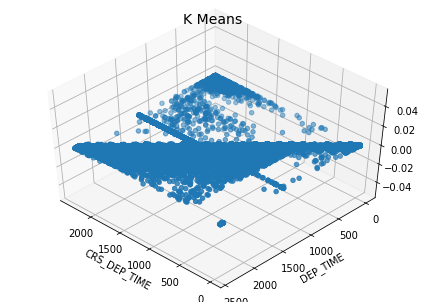

In [ ]:
#kmeans#detection1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D



kFit = KMeans(n_clusters=10).fit(detection1)
kFit.predict(detection1)
label = kFit.labels_

fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134, )
ax.scatter(detection1.iloc[:,0], detection1.iloc[:,1])
ax.set_xlabel("CRS_DEP_TIME")
ax.set_ylabel("DEP_TIME")
plt.title("K Means", fontsize=14)
plt.show()

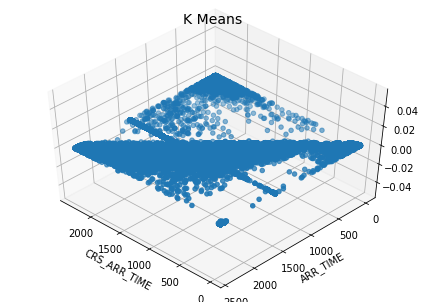

In [ ]:
#kmeans#detection2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D



kFit = KMeans(n_clusters=10).fit(detection2)
kFit.predict(detection2)
label = kFit.labels_

fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(detection2.iloc[:,0], detection2.iloc[:,1])
ax.set_xlabel("CRS_ARR_TIME")
ax.set_ylabel("ARR_TIME")
plt.title("K Means", fontsize=14)
plt.show()

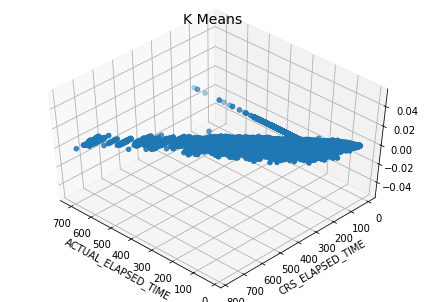

In [ ]:
#kmeans#detection3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D



kFit = KMeans(n_clusters=10).fit(detection3)
kFit.predict(detection3)
label = kFit.labels_

fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(detection3.iloc[:,0], detection3.iloc[:,1])
ax.set_xlabel("ACTUAL_ELAPSED_TIME")
ax.set_ylabel("CRS_ELAPSED_TIME")
plt.title("K Means", fontsize=14)
plt.show()

In [ ]:
n_cluster = range(1, 15)
kmeans = [KMeans(n_clusters=i).fit(detection1) for i in n_cluster]
scores = [kmeans[i].score(detection1) for i in range(len(kmeans))]
cluster_model = kmeans[5]
detection1['cluster'] = cluster_model.predict(detection1)
detection1['cluster'].value_counts()
centers = cluster_model.cluster_centers_
points = np.asarray(detection1)
total_distance = pd.Series()

n_cluster = range(1, 15)
kmeans = [KMeans(n_clusters=i).fit(detection2) for i in n_cluster]
scores = [kmeans[i].score(detection2) for i in range(len(kmeans))]
cluster_model = kmeans[5]
detection2['cluster'] = cluster_model.predict(detection2)
detection2['cluster'].value_counts()
centers = cluster_model.cluster_centers_
points = np.asarray(detection2)
total_distance = pd.Series()

n_cluster = range(1, 15)
kmeans = [KMeans(n_clusters=i).fit(detection3) for i in n_cluster]
scores = [kmeans[i].score(detection3) for i in range(len(kmeans))]
cluster_model = kmeans[5]
detection3['cluster'] = cluster_model.predict(detection3)
detection3['cluster'].value_counts()
centers = cluster_model.cluster_centers_
points = np.asarray(detection3)
total_distance = pd.Series()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernel

In [ ]:
def get_sum_square_distance(detection1, cluster_model):
    centers = cluster_model.cluster_centers_
    points = np.asarray(detection1)
    total_distance = pd.Series()
    for i in range(len(points)):
        distance = 0
    
    return total_distance

def get_sum_square_distance(detection1, cluster_model):
    centers = cluster_model.cluster_centers_
    points = np.asarray(detection2)
    total_distance = pd.Series()
    for i in range(len(points)):
        distance = 0
    
    return total_distance

def get_sum_square_distance(detection1, cluster_model):
    centers = cluster_model.cluster_centers_
    points = np.asarray(detection3)
    total_distance = pd.Series()
    for i in range(len(points)):
        distance = 0
    
    return total_distance



In [ ]:
detection1['ssd'] = get_sum_square_distance(detection1, cluster_model)
detection2['ssd'] = get_sum_square_distance(detection2, cluster_model)
detection3['ssd'] = get_sum_square_distance(detection3, cluster_model)
cutoff = 6
cutoff = 6

detection1['anomaly'] = (detection1['ssd'] >= cutoff).astype(int)
detection2['anomaly'] = (detection2['ssd'] >= cutoff).astype(int)
detection3['anomaly'] = (detection3['ssd'] >= cutoff).astype(int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/l

In [ ]:
k1 = (detection1['DEP_TIME'] >= detection1['DEP_TIME'].quantile(0.98)) 
k2 = (detection1['CRS_DEP_TIME_Mean'] >= detection1['CRS_DEP_TIME_Mean'].quantile(0.98))
k3 = (detection2['ARR_TIME'] >= detection2['ARR_TIME'].quantile(0.98)) 
k4 = (detection2['CRS_ARR_TIME_Mean'] >= detection2['CRS_ARR_TIME_Mean'].quantile(0.98))
k5 = (detection3['ACTUAL_ELAPSED_TIME_Mean'] >= detection3['ACTUAL_ELAPSED_TIME_Mean'].quantile(0.98)) 
k6 = (detection3['CRS_ELAPSED_TIME'] >= detection3['CRS_ELAPSED_TIME'].quantile(0.98))

detection1['anomaly_manual'] = (k1 | k2).astype(np.int)
detection2['anomaly_manual'] = (k3 | k4).astype(np.int)
detection3['anomaly_manual'] = (k5 | k6).astype(np.int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

In [ ]:
f1_kmeans = f1_score(detection1['anomaly_manual'],detection1['anomaly'],average='macro')
acc_kmeans = accuracy_score(detection1['anomaly_manual'],detection1['anomaly'])
pre_kmeans = precision_score(detection1['anomaly_manual'],detection1['anomaly'],average='macro')
roc_kmeans = roc_auc_score(detection1['anomaly_manual'],detection1['anomaly'],average='macro')
sen_kmeans, spec_kmeans = get_sensitivity_specificity(detection1['anomaly_manual'],detection1['anomaly'])
met_kmeans = {
           'f1_score': f1_kmeans,
           'accuracy': acc_kmeans,
           'precision_score': pre_kmeans,
           'roc_score': roc_kmeans,
           'sensitivity': sen_kmeans
          }

f1_kmeans = f1_score(detection2['anomaly_manual'],detection2['anomaly'], average='macro')
acc_kmeans = accuracy_score(detection2['anomaly_manual'],detection2['anomaly'])
pre_kmeans = precision_score(detection2['anomaly_manual'],detection2['anomaly'], average='macro')
roc_kmeans = roc_auc_score(detection2['anomaly_manual'],detection2['anomaly'], average='macro')
sen_kmeans, spec_kmeans = get_sensitivity_specificity(detection2['anomaly_manual'],detection2['anomaly'])
met_kmeans2 = {
           'f1_score': f1_kmeans,
           'accuracy': acc_kmeans,
           'precision_score': pre_kmeans,
           'roc_score': roc_kmeans,
           'sensitivity': sen_kmeans
          }
f1_kmeans = f1_score(detection3['anomaly_manual'],detection3['anomaly'], average='macro')
acc_kmeans = accuracy_score(detection3['anomaly_manual'],detection3['anomaly'])
pre_kmeans = precision_score(detection3['anomaly_manual'],detection3['anomaly'], average='macro')
roc_kmeans = roc_auc_score(detection3['anomaly_manual'],detection3['anomaly'], average='macro')
sen_kmeans, spec_kmeans = get_sensitivity_specificity(detection3['anomaly_manual'],detection3['anomaly'])
met_kmeans3 = {
           'f1_score': f1_kmeans,
           'accuracy': acc_kmeans,
           'precision_score': pre_kmeans,
           'roc_score': roc_kmeans,
           'sensitivity': sen_kmeans
          }

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in long_scalars
  """
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in long_scalars
  """
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.

In [ ]:
metrics = {'detection1': met_kmeans,
           'detection2': met_kmeans2,
           'detection3': met_kmeans3
           }
metrics_df = pd.DataFrame.from_dict(metrics)
metrics_df

,detection1,detection2,detection3
f1_score,0.493353,0.492277,0.49386
accuracy,0.973759,0.969579,0.97574
precision_score,0.486880,0.484790,0.48787
roc_score,0.500000,0.500000,0.50000
sensitivity,0.973759,0.969579,0.97574


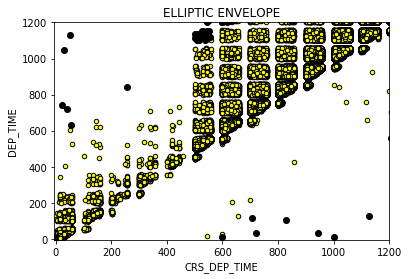

In [ ]:
#detection1#EE
from sklearn.covariance import EllipticEnvelope
import numpy as np
import matplotlib.pyplot as plt


clf = EllipticEnvelope(contamination=.01,random_state=0)
clf.fit(detection1)
ee_scores = pd.Series(clf.decision_function(detection1)) 
detection1['anomaly33'] = pd.Series(clf.predict(detection1))
detection1['anomaly33'] = detection1['anomaly33'].map( {1: 0, -1: 1} )
detection1['anomaly33'].value_counts()
cmap=np.array(['yellow','black'])
plt.scatter(detection1.iloc[:,0],detection1.iloc[:,1],c='yellow',s=20,edgecolor='k')
X=ee_predict.iloc[:,0]
Y=ee_predict.iloc[:,1]
plt.xlim((-5, 1200))
plt.ylim((-5, 1200))
plt.scatter(X,Y,c='black')
plt.xlabel('CRS_DEP_TIME')
plt.ylabel('DEP_TIME')
plt.title('ELLIPTIC ENVELOPE')
plt.show()

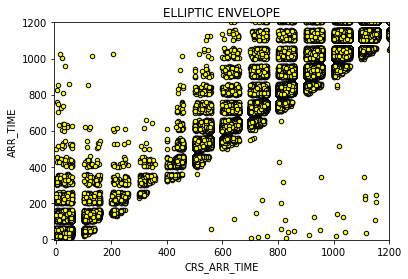

In [ ]:
#detection2#EE
from sklearn.covariance import EllipticEnvelope

clf = EllipticEnvelope(contamination=.01,random_state=0)
clf.fit(detection2)
ee_scores = pd.Series(clf.decision_function(detection2)) 
detection2['anomaly33'] = pd.Series(clf.predict(detection2))
detection2['anomaly33'] = detection2['anomaly33'].map( {1: 0, -1: 1} )
detection2['anomaly33'].value_counts()
cmap=np.array(['yellow','black'])
plt.scatter(detection2.iloc[:,0],detection2.iloc[:,1],c='yellow',s=20,edgecolor='k')
X=ee_predict.iloc[:,0]
Y=ee_predict.iloc[:,1]
plt.scatter(X,Y,c='black')
plt.xlim((-5, 1200))
plt.ylim((-5, 1200))
plt.xlabel('CRS_ARR_TIME')
plt.ylabel('ARR_TIME')
plt.title('ELLIPTIC ENVELOPE')
plt.show()

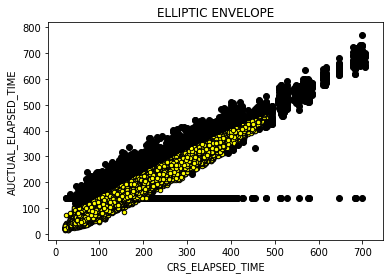

In [ ]:
from sklearn.covariance import EllipticEnvelope

clf = EllipticEnvelope(contamination=.01,random_state=0)
clf.fit(detection3)
ee_scores = pd.Series(clf.decision_function(detection3)) 
detection3['anomaly33'] = pd.Series(clf.predict(detection3))
detection3['anomaly33'] = detection3['anomaly33'].map( {1: 0, -1: 1} )
detection3['anomaly33'].value_counts()
cmap=np.array(['yellow','black'])
plt.scatter(detection3.iloc[:,0],detection3.iloc[:,1],c='yellow',s=20,edgecolor='k')
X=ee_predict.iloc[:,0]
Y=ee_predict.iloc[:,1]
plt.scatter(X,Y,c='black')
plt.xlabel('CRS_ELAPSED_TIME')
plt.ylabel('AUCTUAL_ELAPSED_TIME')
plt.title('ELLIPTIC ENVELOPE')
plt.show()

In [ ]:
import numpy as np
e1 = (detection1['DEP_TIME'] >= detection1['DEP_TIME'].quantile(0.98)) 
e2 = (detection1['CRS_DEP_TIME_Mean'] >= detection1['CRS_DEP_TIME_Mean'].quantile(0.98))
e3 = (detection2['ARR_TIME'] >= detection2['ARR_TIME'].quantile(0.98)) 
e4 = (detection2['CRS_ARR_TIME_Mean'] >= detection2['CRS_ARR_TIME_Mean'].quantile(0.98))
e5 = (detection3['ACTUAL_ELAPSED_TIME_Mean'] >= detection3['ACTUAL_ELAPSED_TIME_Mean'].quantile(0.98)) 
e6 = (detection3['CRS_ELAPSED_TIME'] >= detection3['CRS_ELAPSED_TIME'].quantile(0.98))
detection1['anomaly_manual'] = (e1 | e2).astype(np.int)
detection2['anomaly_manual'] = (e3 | e4).astype(np.int)
detection3['anomaly_manual'] = (e5 | e6).astype(np.int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

In [ ]:
f1_ee = f1_score(detection1['anomaly_manual'],detection1['anomaly33'])
acc_ee = accuracy_score(detection1['anomaly_manual'],detection1['anomaly33'])
roc_ee = roc_auc_score(detection1['anomaly_manual'],detection1['anomaly33'])
pre_ee = precision_score(detection1['anomaly_manual'],detection1['anomaly33'])
sen_ee, spec_ee = get_sensitivity_specificity(detection1['anomaly_manual'],detection1['anomaly33'])
met_ee = {
           'f1_score': f1_ee,
           'accuracy': acc_ee,
           'precision':pre_ee,
           'roc_score': roc_ee,
           'sensitivity': sen_ee,
           'specificity': spec_ee
}


f1_ee = f1_score(detection2['anomaly_manual'],detection2['anomaly33'])
acc_ee = accuracy_score(detection2['anomaly_manual'],detection2['anomaly33'])
roc_ee = roc_auc_score(detection2['anomaly_manual'],detection2['anomaly33'])
pre_ee = precision_score(detection2['anomaly_manual'],detection2['anomaly33'])
sen_ee, spec_ee = get_sensitivity_specificity(detection2['anomaly_manual'],detection2['anomaly33'])
met_ee2 = {
           'f1_score': f1_ee,
           'accuracy': acc_ee,
           'precision':pre_ee,
           'roc_score': roc_ee,
           'sensitivity': sen_ee,
           'specificity': spec_ee
}
f1_ee = f1_score(detection3['anomaly_manual'],detection3['anomaly33'])
acc_ee = accuracy_score(detection3['anomaly_manual'],detection3['anomaly33'])
roc_ee = roc_auc_score(detection3['anomaly_manual'],detection3['anomaly33'])
pre_ee = precision_score(detection3['anomaly_manual'],detection3['anomaly33'])
sen_ee, spec_ee = get_sensitivity_specificity(detection3['anomaly_manual'],detection3['anomaly33'])
met_ee3 = {
           'f1_score': f1_ee,
           'accuracy': acc_ee,
           'precision':pre_ee,
           'roc_score': roc_ee,
           'sensitivity': sen_ee,
           'specificity': spec_ee
}


In [ ]:
metrics = {'detection1': met_ee,
           'detection2': met_ee2,
           'detection3': met_ee3
           
           }
metrics_df = pd.DataFrame.from_dict(metrics)
metrics_df

,detection1,detection2,detection3
f1_score,0.226227,0.346599,0.520500
accuracy,0.972072,0.974165,0.983761
precision,0.408726,0.685330,0.881366
roc_score,0.575165,0.614356,0.684040
sensitivity,0.977756,0.977082,0.984795
specificity,0.408726,0.685330,0.881366


In [ ]:
outlier_fraction = 0.028
model =  OneClassSVM(nu=outlier_fraction,  degree=2, kernel='rbf')
data = detection3.loc[detection3.ACTUAL_ELAPSED_TIME_Mean <=detection3.ACTUAL_ELAPSED_TIME_Mean.quantile(1-outlier_fraction)]
model.fit(data)

outlier_fraction = 0.028
model =  OneClassSVM(nu=outlier_fraction,  degree=2, kernel='rbf')
data = detection2.loc[detection2.ARR_TIME <=detection2.CRS_ARR_TIME_Mean.quantile(1-outlier_fraction)]
model.fit(data)

outlier_fraction = 0.028
model =  OneClassSVM(nu=outlier_fraction,  degree=2, kernel='rbf')
data = detection1.loc[detection1.DEP_TIME <=detection1.CRS_DEP_TIME_Mean.quantile(1-outlier_fraction)]
model.fit(data)

OneClassSVM(cache_size=200, coef0=0.0, degree=2, gamma='scale', kernel='rbf',
            max_iter=-1, nu=0.028, shrinking=True, tol=0.001, verbose=False)

In [ ]:
detection3['anomaly_svm'] = pd.Series(model.predict(detection3))
detection3['anomaly_svm'] = detection3['anomaly_svm'].map( {1: 0, -1: 1} )

detection2['anomaly_svm'] = pd.Series(model.predict(detection2))
detection2['anomaly_svm'] = detection3['anomaly_svm'].map( {1: 0, -1: 1} )


detection1['anomaly_svm'] = pd.Series(model.predict(detection1))
detection1['anomaly_svm'] = detection1['anomaly_svm'].map( {1: 0, -1: 1} )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
p1 = (detection1['DEP_TIME'] >= detection1['DEP_TIME'].quantile(0.98)) 
p2 = (detection1['CRS_DEP_TIME_Mean'] >= detection1['CRS_DEP_TIME_Mean'].quantile(0.98))
p3 = (detection2['ARR_TIME'] >= detection2['ARR_TIME'].quantile(0.98)) 
p4 = (detection2['CRS_ARR_TIME_Mean'] >= detection2['CRS_ARR_TIME_Mean'].quantile(0.98))
p5 = (detection3['ACTUAL_ELAPSED_TIME_Mean'] >= detection3['ACTUAL_ELAPSED_TIME_Mean'].quantile(0.98)) 
p6 = (detection3['CRS_ELAPSED_TIME'] >= detection3['CRS_ELAPSED_TIME'].quantile(0.98))

detection1['anomaly_manual'] = (p1 | p2).astype(np.int)
detection2['anomaly_manual'] = (p3 | p4).astype(np.int)
detection3['anomaly_manual'] = (p5 | p6).astype(np.int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

In [ ]:
detection3['anomaly_manual'] = detection3['anomaly_manual'].fillna(0)
detection3['anomaly_svm'] = detection3['anomaly_svm'].fillna(0)
acc_svm = accuracy_score(detection3['anomaly_manual'],detection3['anomaly_svm'])
met_svm = {
           'accuracy': acc_svm
           
          }

detection2['anomaly_manual'] = detection2['anomaly_manual'].fillna(0)
detection2['anomaly_svm'] = detection2['anomaly_svm'].fillna(0)
acc_svm2 = accuracy_score(detection2['anomaly_manual'],detection2['anomaly_svm'])
met_svm2 = {
           
           'accuracy': acc_svm2
           
          }


detection1['anomaly_manual'] = detection1['anomaly_manual'].fillna(0)
detection1['anomaly_svm'] = detection1['anomaly_svm'].fillna(0)

acc_svm3 = accuracy_score(detection1['anomaly_manual'],detection1['anomaly_svm'])
met_svm3 = {
          
           'accuracy': acc_svm3
          }

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
metrics = { 'detection2': met_svm2,
           'detection1': met_svm3
          }
metrics_df = pd.DataFrame.from_dict(metrics)

metrics_df

,detection2,detection1
accuracy,0.969579,0.922278


Estimated number of anomalies: 28784


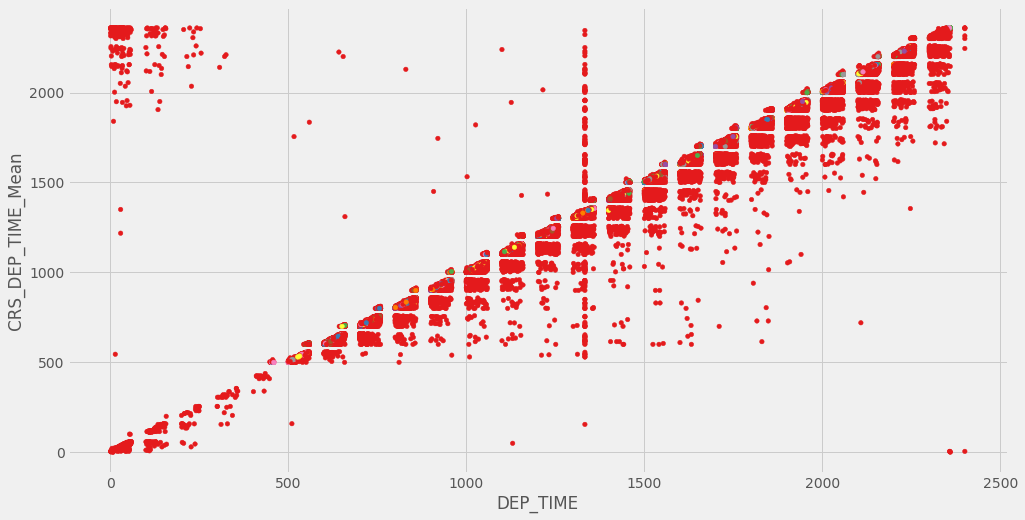

In [ ]:
from sklearn.cluster import DBSCAN
outlier_detection = DBSCAN(eps = .2, metric="euclidean", min_samples = 5,n_jobs = -1)
clusters = outlier_detection.fit_predict(detection1)
from matplotlib import cm
cmap = cm.get_cmap('Set1')
detection1.plot.scatter(x='DEP_TIME',y='CRS_DEP_TIME_Mean', c=clusters, cmap=cmap,colorbar = False)
n_noise_ = list(clusters).count(-1)
print('Estimated number of anomalies: %d' % n_noise_)

Estimated number of anomalies: 45661


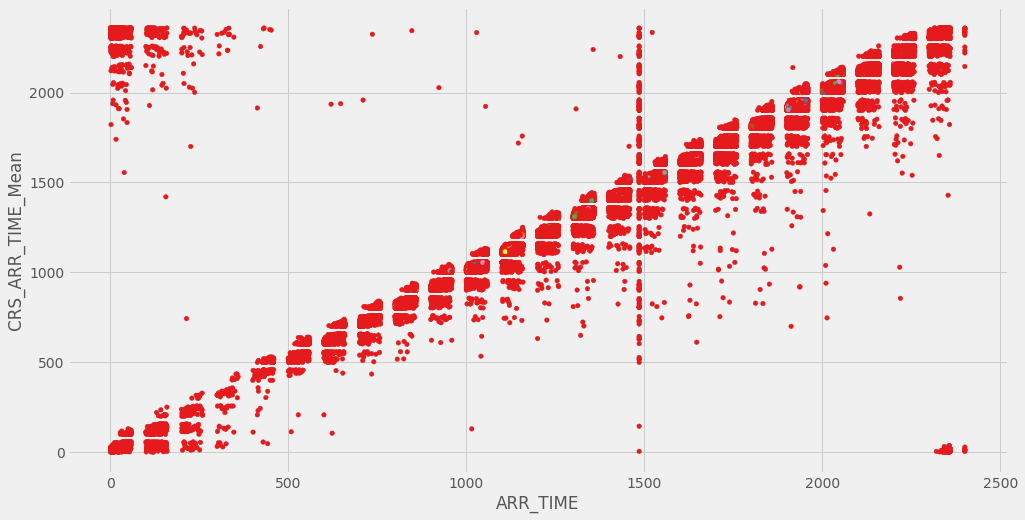

In [ ]:
from sklearn.cluster import DBSCAN
outlier_detection = DBSCAN(eps = .2, metric="euclidean", min_samples = 5,n_jobs = -1)
clusters = outlier_detection.fit_predict(detection2)
from matplotlib import cm
cmap = cm.get_cmap('Set1')
detection2.plot.scatter(x='ARR_TIME',y='CRS_ARR_TIME_Mean', c=clusters, cmap=cmap,colorbar = False)
n_noise_ = list(clusters).count(-1)
print('Estimated number of anomalies: %d' % n_noise_)

Estimated number of anomalies: 20062


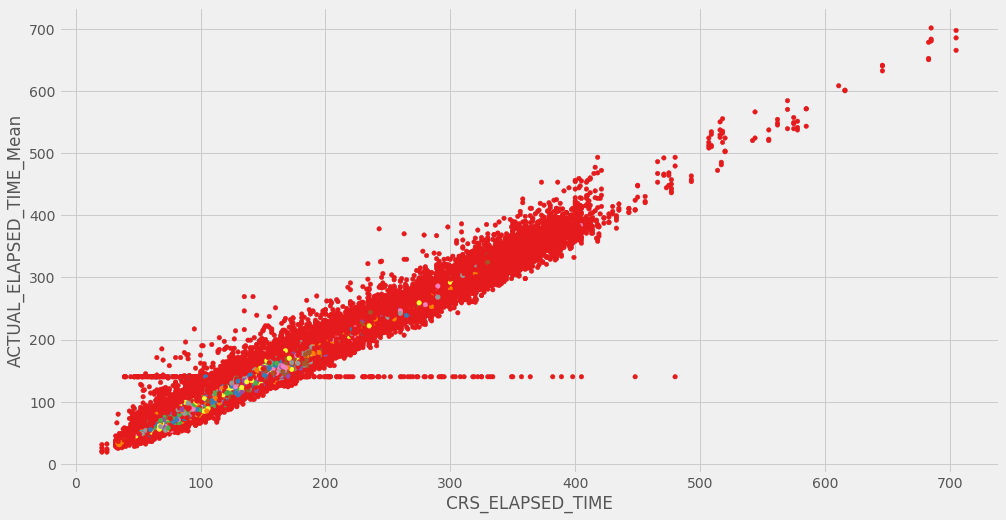

In [ ]:
from sklearn.cluster import DBSCAN
outlier_detection = DBSCAN(eps = .2, metric="euclidean", min_samples = 5,n_jobs = -1)
clusters = outlier_detection.fit_predict(detection3)
from matplotlib import cm
cmap = cm.get_cmap('Set1')
detection3.plot.scatter(x='CRS_ELAPSED_TIME',y='ACTUAL_ELAPSED_TIME_Mean', c=clusters, cmap=cmap,colorbar = False)
n_noise_ = list(clusters).count(-1)
print('Estimated number of anomalies: %d' % n_noise_)

In [ ]:
import sklearn
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
#dbscan#detection1
detection1, label = make_moons(n_samples = 250, noise = 0.2)
detection1[0:-1]

array([[ 1.35283443e+00, -7.40696275e-01],
       [ 2.33401785e+00,  5.00519496e-02],
       [ 1.70103223e-01,  8.73428265e-01],
       [ 3.11604279e-01,  6.53616013e-01],
       [ 2.02039720e+00,  5.81093098e-01],
       [-4.56304476e-01,  6.84994405e-01],
       [-6.13474040e-01,  1.11144852e+00],
       [ 1.00318143e+00, -2.04750483e-01],
       [-1.98919150e-01,  1.21457996e+00],
       [ 1.78575020e+00, -2.67259982e-01],
       [ 1.47919977e+00, -4.43421254e-01],
       [ 3.08493120e-01, -2.74557928e-02],
       [ 2.18194339e+00,  5.86638179e-01],
       [-2.38221509e-01,  1.21900361e-01],
       [ 1.80644634e+00, -3.12129869e-03],
       [ 4.31223392e-01, -5.53162594e-01],
       [ 6.71897486e-02,  1.09888186e+00],
       [-9.74443341e-01,  1.40841603e-01],
       [-7.44907350e-01, -1.83132121e-02],
       [ 3.63834270e-01,  8.70449798e-01],
       [ 2.07761188e+00,  6.67249379e-01],
       [-1.45041060e+00,  2.39932544e-01],
       [ 2.03770625e+00,  3.48207160e-01],
       [ 6.

In [ ]:
cluster = DBSCAN(eps = 0.5, min_samples= 15)
cluster.fit(detection1)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=15, n_jobs=None, p=None)

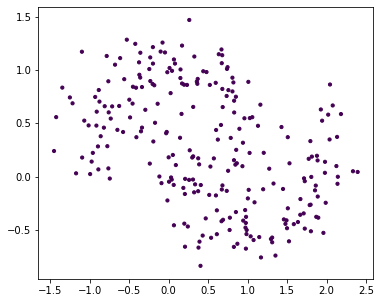

In [ ]:
#The  data points which are far away from the moon-shaped clusters are known as Outliers
fig, ax = plt.subplots(figsize=(6,5))
ax.scatter(detection1[:,0], detection1[:,1], c=cluster.labels_,s=10, cmap='viridis')
fig.show()

In [ ]:
#dbscan#detection2
detection2, label = make_moons(n_samples = 250, noise = 0.2)
detection2[0:-1]

array([[ 2.02258575e+00,  6.64696380e-01],
       [ 4.14515631e-02,  3.69099790e-01],
       [-6.44524062e-01,  1.12546832e+00],
       [ 9.20965000e-01,  1.42078201e-01],
       [-4.56967782e-01,  8.62217471e-01],
       [-7.24906948e-01,  7.54828898e-01],
       [ 7.58030258e-01, -6.96184966e-02],
       [ 2.25815815e-02,  3.85591695e-02],
       [ 5.73136036e-01, -3.66674464e-01],
       [-1.09916765e+00,  9.29681629e-02],
       [ 1.85015126e+00, -2.97162337e-01],
       [ 1.23722499e+00, -3.24084797e-01],
       [-3.71582813e-01,  2.69030682e-01],
       [-1.27377810e+00,  6.75443533e-01],
       [ 1.04574999e-01,  3.70863880e-01],
       [ 6.13035613e-02, -4.05329422e-01],
       [ 1.05790419e+00,  4.76249072e-01],
       [ 1.79553890e+00, -4.75554434e-01],
       [-2.09941264e-01,  1.02974984e+00],
       [ 8.83379240e-02,  2.36539349e-01],
       [ 9.66829067e-02,  1.91049472e-01],
       [ 7.96240353e-01, -5.02071747e-01],
       [-5.81638795e-01,  1.04745211e+00],
       [-4.

In [ ]:
cluster = DBSCAN(eps = 0.5, min_samples= 15)
cluster.fit(detection2)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=15, n_jobs=None, p=None)

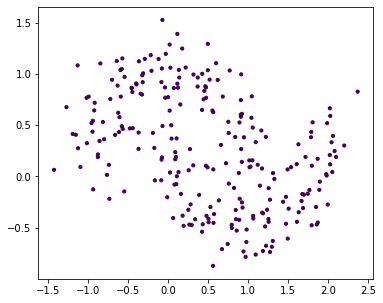

In [ ]:
#The  data points which are far away from the moon-shaped clusters are known as Outliers
fig, ax = plt.subplots(figsize=(6,5))
ax.scatter(detection2[:,0], detection2[:,1], c=cluster.labels_,s=10, cmap='viridis')
fig.show()

In [ ]:
#dbscan#detection3
detection3, label = make_moons(n_samples = 250, noise = 0.2)
detection3[0:-1]

array([[ 0.84197547, -0.58260976],
       [ 0.01450494,  0.96591306],
       [ 1.11486058, -0.21939386],
       [ 1.81193095,  0.39628942],
       [ 0.54970038,  0.79742614],
       [ 1.09649921, -0.7309722 ],
       [ 0.89545603, -0.52661307],
       [ 0.07288196,  0.23781165],
       [-0.06428878,  1.19616566],
       [-0.50402093,  0.64536593],
       [ 0.38490544,  1.1370569 ],
       [ 0.40129654, -0.4221489 ],
       [ 1.71911134, -0.3338318 ],
       [ 1.1714184 , -0.03378016],
       [-0.13147446,  1.12140684],
       [ 0.51358746,  1.07336056],
       [ 1.44283787, -0.38928808],
       [ 0.84462433,  0.72786077],
       [ 0.51428703,  0.85023767],
       [ 0.76951273,  0.40012681],
       [ 0.99714962, -0.55993224],
       [-0.71089741,  0.56353286],
       [ 2.05034917, -0.25450529],
       [-0.98599718,  0.3834691 ],
       [ 0.30709406,  1.11738914],
       [-1.06433431, -0.07630581],
       [-0.20898243,  0.06071097],
       [-1.0521421 ,  0.44657245],
       [ 1.17018855,

In [ ]:
cluster = DBSCAN(eps = 0.5, min_samples= 15)
cluster.fit(detection3)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=15, n_jobs=None, p=None)

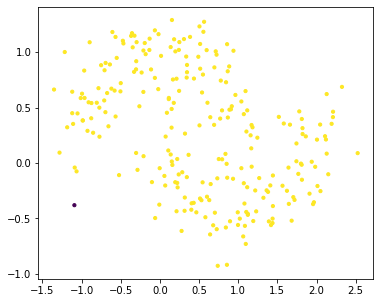

In [ ]:
#The  data points which are far away from the moon-shaped clusters are known as Outliers
fig, ax = plt.subplots(figsize=(6,5))
ax.scatter(detection3[:,0], detection3[:,1], c=cluster.labels_,s=10, cmap='viridis')
fig.show()

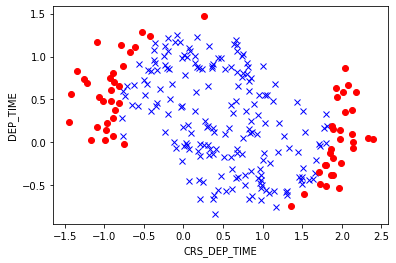

In [ ]:
#oneclasssvm#detection2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import OneClassSVM
oc = OneClassSVM(nu=0.25, gamma=0.05)
oc.fit(detection1)
pred = oc.predict(detection1)
# inliers are labeled 1, outliers are labeled -1
normal = detection1[pred == 1]
abnormal = detection1[pred == -1]
plt.figure()
plt.plot(normal[:,0],normal[:,1],'bx')
plt.plot(abnormal[:,0],abnormal[:,1],'ro')
plt.xlabel('CRS_DEP_TIME')
plt.ylabel('DEP_TIME')
plt.show()

In [ ]:
#oneclasssvm#detection2
from sklearn.svm import OneClassSVM
oc = OneClassSVM(nu=0.25, gamma=0.05)
oc.fit(detection2)
pred = oc.predict(detection2)

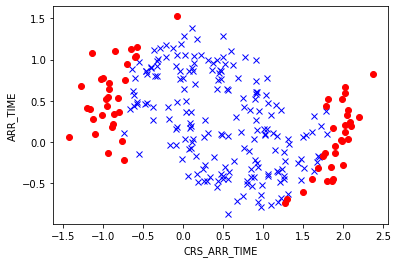

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# inliers are labeled 1, outliers are labeled -1
normal = detection2[pred == 1]
abnormal = detection2[pred == -1]
plt.figure()
plt.plot(normal[:,0],normal[:,1],'bx')
plt.plot(abnormal[:,0],abnormal[:,1],'ro')
plt.xlabel('CRS_ARR_TIME')
plt.ylabel('ARR_TIME')
plt.show()

In [ ]:
#oneclasssvm#detection3
from sklearn.svm import OneClassSVM
oc = OneClassSVM(nu=0.25, gamma=0.05)
oc.fit(detection3)
pred = oc.predict(detection3)

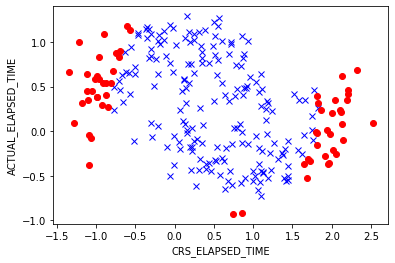

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# inliers are labeled 1, outliers are labeled -1
normal = detection3[pred == 1]
abnormal = detection3[pred == -1]
plt.figure()
plt.plot(normal[:,0],normal[:,1],'bx')
plt.plot(abnormal[:,0],abnormal[:,1],'ro')
plt.xlabel('CRS_ELAPSED_TIME')
plt.ylabel('ACTUAL_ELAPSED_TIME')
plt.show()